Multiclass Neural Network Classifier with One Hidden Layer
MNIST dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import idx2numpy
import numpy as npy
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [3]:
def datafunc(file):
    array = idx2numpy.convert_from_file(file)
    return array 

In [4]:
X_traindata = datafunc('train-images.idx3-ubyte')
Y_trainlabel = datafunc('train-labels.idx1-ubyte')
X_testdata = datafunc('t10k-images.idx3-ubyte')
Y_testlabel = datafunc('t10k-labels.idx1-ubyte')

In [5]:
X_traindata.shape, X_testdata.shape, Y_trainlabel.shape, Y_testlabel.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [6]:
def reshapedata(ar, rows, col):
    ar = ar.reshape(rows, col)
    return ar

In [7]:
X_traindata = reshapedata(X_traindata, 60000, 784)
X_testdata = reshapedata(X_testdata, 10000, 784)

In [8]:
X_traindata.shape, X_testdata.shape, Y_trainlabel.shape, Y_testlabel.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X_traindata, Y_trainlabel, test_size = 0.3, random_state = 42)

HOT LABEL FOR OUTPUT ENCONDING

In [10]:
Y_trainNew = Y_trainlabel
Y_trainlabel.shape

(60000,)

In [11]:
Y_trainlabel = pd.get_dummies(Y_trainlabel)
Y_trainlabel = npy.array(Y_trainlabel)

HOT LABEL FOR OUTPUT VALIDATION

In [12]:
Y_train = pd.get_dummies(Y_train)
Y_train = npy.array(Y_train)
Y_train.shape

(42000, 10)

In [13]:
Y_trainlabel.shape

(60000, 10)

INITIALISE WEIGHTS, BIAS with the help of Neurons and INPUTS

In [14]:
def initiate_weight(ip, hNeu, oNeu):
    w1 = npy.random.randn(ip,hNeu)*npy.sqrt(1./ip)
    b1 = npy.zeros((1,hNeu))*npy.sqrt(1./ip)
    w2 = npy.random.randn(hNeu, oNeu)*npy.sqrt(1./hNeu)
    b2 = npy.zeros((1, oNeu))* npy.sqrt(1./hNeu)
    return w1,b1,w2,b2

Now we will define ALL THE ACTIVATION FUNCTIONS as python definitions

SIGMOID FUNCTION

In [15]:
def sigmodfunc(sg):
    sf = 1./(1. + npy.exp(-sg))
    return sf

TANh Activation

In [16]:
def tanhfunc(th):
    tf = (npy.exp(th) - npy.exp(-th)) / (npy.exp(th) + npy.exp(-th))
    return tf

SOFTMAX 

In [17]:
def softm(sm):
    sf = npy.exp(sm) / npy.sum(npy.exp(sm), axis =1 ,keepdims= True)
    return sf

Now We will right required neural network operations

FEEDFORWARD:

In [18]:
def feedfwd(X_t , w1, b1, w2, b2, af):
    z1 = npy.dot(X_t, w1) + b1
    h1 = af(z1)
    
    z2 = npy.dot(h1,w2) + b2
    op = softm(z2)
    return z1, h1, z2, op

ERROR:

In [19]:
def err(ypd, Y_t):
    n = Y_t.shape[0]
    error = (ypd - Y_t) / n 
    return error

Derivative of Sigmoid:

In [20]:
def sig_deriv(sd):
    der_sg = sd * (1-sd)
    return der_sg

Cross Entropy LOSS: 

In [21]:
def crossent(yp , Y_t):
    Err_agg = npy.sum(npy.multiply(Y_t, npy.log(yp)))
    n = Y_t.shape[0]
    Error = -(1. / n) * Err_agg
    return Error

Tanh Derivative:

In [22]:
def tanh_deriv(td):
    der_th = 1 - td**2
    return der_th

BackPropagation:

In [23]:
def backPro(h1, w2, yp , Y_t, X_t, derivf):
    Error_agg = err(yp, Y_t)
    output = Error_agg 
    del_w2 = npy.dot(h1.T,output)
    del_b2 = npy.sum(output,axis=0,keepdims=True)
    del_h1 = npy.dot(output, w2.T)
    new_h1 = del_h1 * derivf(h1)
    del_w1 = npy.dot(X_t.T, new_h1)
    del_b1 = npy.sum(new_h1, axis=0, keepdims=True)
    return del_w2 , del_b2 , del_w1, del_b1 

Update Weights:

In [24]:
def up_weights(alpha, w1, b1, w2, b2, del_w2, del_b2, del_w1, del_b1):
    w2 = w2 - (alpha* del_w2)
    b2 = b2 - (alpha* del_b2)
    w1 = w1 - (alpha* del_w1)
    b1 = b1 - (alpha* del_b1)
    return w2,b2,w1,b1

Since we have all required functions No we will write Training Function as follows:

In [25]:
def train(X_t, Y_t, neu, lern, n, acf, derf):
    hNeu = neu 
    ip = X_t.shape[1]
    oNeu = Y_t.shape[1]
    alpha = lern
    epc = n
    
    y_actual = npy.argmax(Y_t, axis=1)
    
    w1,b1,w2,b2 = initiate_weight(ip , hNeu, oNeu)
    accuracy_list=[]
    loss_list=[]
    
    for i in range(epc):
        dotfirst , h1, dotsec, op = feedfwd(X_t,w1,b1,w2,b2,acf) #First feedforward operation to get h1 and 2 of the dot products
        
        del_w2, del_b2, del_w1, del_b1 = backPro(h1, w2, op, Y_t, X_t, derf) #backpropagation to get derivatives 
        
        w2, b2, w1, b1 = up_weights(alpha, w1, b1, w2, b2, del_w2, del_b2, del_w1, del_b1) #update weights and bias for next round
        
        dotfirst, h1 , dotsec, op = feedfwd(X_t,w1,b1,w2,b2,acf) #Second feedforward operation to get h1 and 2 of the dot products
        
        total_loss = crossent(op, Y_t) # get the total loss using cross entropy
        print("EPOCH Number --> {} ===>> Training Loss = {}".format(i+1, total_loss))
        loss_list.append(total_loss) # preserve the loss in the list
    
        class_label = npy.argmax(op,axis=1) # retrieve the class label
    
        acc = round((accuracy_score(y_actual, class_label)*100),2) #calculate accuracy
        print("EPOCH NUMBER --> {} ===>> Training Accuracy = {}" .format(i+1, acc))
        accuracy_list.append(acc)#preserve accuracy in the list
    
    return w2,b2,w1,b1,accuracy_list,loss_list

Writing Testing Function:

In [26]:
def test(w2, b2, w1, b1, X_t, Y_t, acf):
    dotfirst, h1, dotsec, op = feedfwd(X_t,w1,b1,w2,b2,acf)
    test = Y_t
    pred = npy.argmax(op, axis=1)
    return test, pred

Calculate Accuracy function:

In [27]:
def get_acc(test, prediction):
    accuracy = round ((accuracy_score(test, prediction)*100), 2)
    return accuracy

Q.3 C) Five different Configurations

Configuration 1

Neurons=64, Learning Rate=0.03, Epochs=300, Activation=Sigmoid Function

In [41]:
config1_w2,config1_b2,config1_w1,config1_b1,config1_accuracy,config1_loss= train(X_train,Y_train,64,0.03,300,sigmodfunc,sig_deriv)

EPOCH Number --> 1 ===>> Training Loss = 2.402410900139516
EPOCH NUMBER --> 1 ===>> Training Accuracy = 12.89
EPOCH Number --> 2 ===>> Training Loss = 2.2979211831751862
EPOCH NUMBER --> 2 ===>> Training Accuracy = 17.44
EPOCH Number --> 3 ===>> Training Loss = 2.2122472698928686
EPOCH NUMBER --> 3 ===>> Training Accuracy = 22.22
EPOCH Number --> 4 ===>> Training Loss = 2.138933677999383
EPOCH NUMBER --> 4 ===>> Training Accuracy = 26.38
EPOCH Number --> 5 ===>> Training Loss = 2.0753819385154797
EPOCH NUMBER --> 5 ===>> Training Accuracy = 30.18
EPOCH Number --> 6 ===>> Training Loss = 2.0194980341559456
EPOCH NUMBER --> 6 ===>> Training Accuracy = 33.92
EPOCH Number --> 7 ===>> Training Loss = 1.9702543951051266
EPOCH NUMBER --> 7 ===>> Training Accuracy = 37.26
EPOCH Number --> 8 ===>> Training Loss = 1.9250905928776585
EPOCH NUMBER --> 8 ===>> Training Accuracy = 40.5
EPOCH Number --> 9 ===>> Training Loss = 1.8815720725637348
EPOCH NUMBER --> 9 ===>> Training Accuracy = 43.65
EPOC

EPOCH Number --> 74 ===>> Training Loss = 0.9788074424861735
EPOCH NUMBER --> 74 ===>> Training Accuracy = 82.18
EPOCH Number --> 75 ===>> Training Loss = 0.9733632845754001
EPOCH NUMBER --> 75 ===>> Training Accuracy = 82.3
EPOCH Number --> 76 ===>> Training Loss = 0.9679460274647349
EPOCH NUMBER --> 76 ===>> Training Accuracy = 82.36
EPOCH Number --> 77 ===>> Training Loss = 0.9625831223649997
EPOCH NUMBER --> 77 ===>> Training Accuracy = 82.53
EPOCH Number --> 78 ===>> Training Loss = 0.9572576681569136
EPOCH NUMBER --> 78 ===>> Training Accuracy = 82.58
EPOCH Number --> 79 ===>> Training Loss = 0.9519282006771465
EPOCH NUMBER --> 79 ===>> Training Accuracy = 82.69
EPOCH Number --> 80 ===>> Training Loss = 0.9466838853375985
EPOCH NUMBER --> 80 ===>> Training Accuracy = 82.79
EPOCH Number --> 81 ===>> Training Loss = 0.9414447078860134
EPOCH NUMBER --> 81 ===>> Training Accuracy = 82.88
EPOCH Number --> 82 ===>> Training Loss = 0.9363005038445377
EPOCH NUMBER --> 82 ===>> Training A

EPOCH Number --> 146 ===>> Training Loss = 0.7177203635727694
EPOCH NUMBER --> 146 ===>> Training Accuracy = 86.67
EPOCH Number --> 147 ===>> Training Loss = 0.7153134998344112
EPOCH NUMBER --> 147 ===>> Training Accuracy = 86.8
EPOCH Number --> 148 ===>> Training Loss = 0.7130748369165092
EPOCH NUMBER --> 148 ===>> Training Accuracy = 86.74
EPOCH Number --> 149 ===>> Training Loss = 0.7107155459361476
EPOCH NUMBER --> 149 ===>> Training Accuracy = 86.85
EPOCH Number --> 150 ===>> Training Loss = 0.7084185871129189
EPOCH NUMBER --> 150 ===>> Training Accuracy = 86.8
EPOCH Number --> 151 ===>> Training Loss = 0.706089378514197
EPOCH NUMBER --> 151 ===>> Training Accuracy = 86.93
EPOCH Number --> 152 ===>> Training Loss = 0.7038336328040858
EPOCH NUMBER --> 152 ===>> Training Accuracy = 86.88
EPOCH Number --> 153 ===>> Training Loss = 0.7015542319734156
EPOCH NUMBER --> 153 ===>> Training Accuracy = 87.0
EPOCH Number --> 154 ===>> Training Loss = 0.6993473833697946
EPOCH NUMBER --> 154 =

EPOCH Number --> 218 ===>> Training Loss = 0.5870158584996358
EPOCH NUMBER --> 218 ===>> Training Accuracy = 88.42
EPOCH Number --> 219 ===>> Training Loss = 0.5855912721175394
EPOCH NUMBER --> 219 ===>> Training Accuracy = 88.57
EPOCH Number --> 220 ===>> Training Loss = 0.584170899368571
EPOCH NUMBER --> 220 ===>> Training Accuracy = 88.48
EPOCH Number --> 221 ===>> Training Loss = 0.5828041702975446
EPOCH NUMBER --> 221 ===>> Training Accuracy = 88.6
EPOCH Number --> 222 ===>> Training Loss = 0.5814096708336148
EPOCH NUMBER --> 222 ===>> Training Accuracy = 88.53
EPOCH Number --> 223 ===>> Training Loss = 0.5800942734311384
EPOCH NUMBER --> 223 ===>> Training Accuracy = 88.64
EPOCH Number --> 224 ===>> Training Loss = 0.5787470209234745
EPOCH NUMBER --> 224 ===>> Training Accuracy = 88.59
EPOCH Number --> 225 ===>> Training Loss = 0.5774603076344335
EPOCH NUMBER --> 225 ===>> Training Accuracy = 88.72
EPOCH Number --> 226 ===>> Training Loss = 0.5761298656880007
EPOCH NUMBER --> 226

EPOCH Number --> 290 ===>> Training Loss = 0.5081402203801867
EPOCH NUMBER --> 290 ===>> Training Accuracy = 89.45
EPOCH Number --> 291 ===>> Training Loss = 0.5068527592523691
EPOCH NUMBER --> 291 ===>> Training Accuracy = 89.6
EPOCH Number --> 292 ===>> Training Loss = 0.5060012209971202
EPOCH NUMBER --> 292 ===>> Training Accuracy = 89.48
EPOCH Number --> 293 ===>> Training Loss = 0.5051504885403976
EPOCH NUMBER --> 293 ===>> Training Accuracy = 89.61
EPOCH Number --> 294 ===>> Training Loss = 0.5042887637004042
EPOCH NUMBER --> 294 ===>> Training Accuracy = 89.5
EPOCH Number --> 295 ===>> Training Loss = 0.5034323828926367
EPOCH NUMBER --> 295 ===>> Training Accuracy = 89.65
EPOCH Number --> 296 ===>> Training Loss = 0.5025407077963312
EPOCH NUMBER --> 296 ===>> Training Accuracy = 89.51
EPOCH Number --> 297 ===>> Training Loss = 0.5016501425542533
EPOCH NUMBER --> 297 ===>> Training Accuracy = 89.66
EPOCH Number --> 298 ===>> Training Loss = 0.5007978875384997
EPOCH NUMBER --> 298

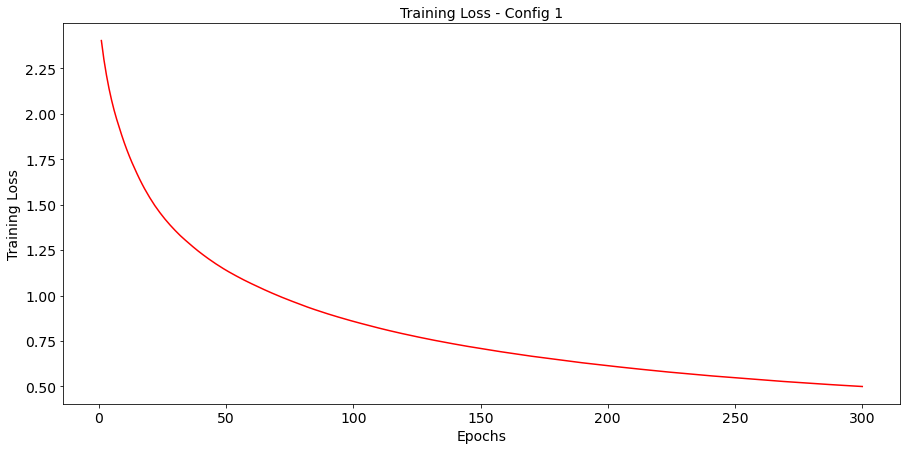

In [42]:
epochs = list (range(1,300+1))
loss = config1_loss
plt.figure(figsize=(15,7))
plt.title('Training Loss - Config 1',fontsize=14)
plt.xlabel('Epochs', size=14)
plt.ylabel('Training Loss', fontsize=14)
plt.tick_params(labelsize=14)
plt.plot(epochs,loss,c='red')

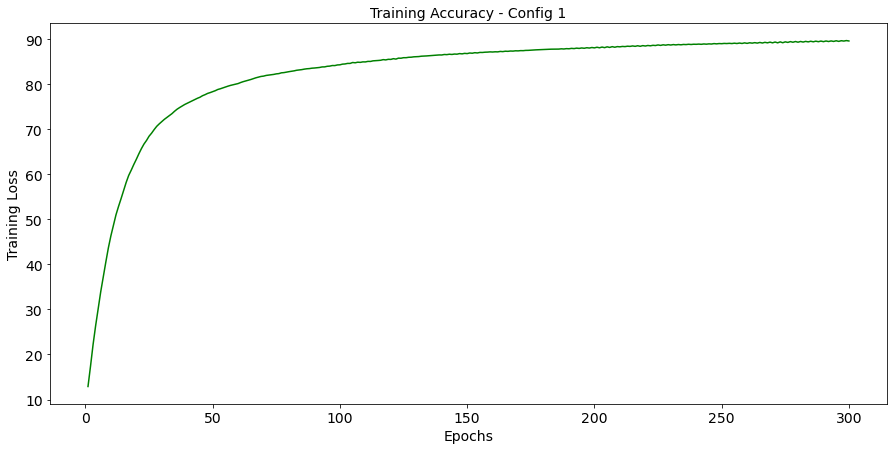

In [43]:
epochs = list(range(1,300+1))
accuracy = config1_accuracy
plt.figure(figsize=(15,7))
plt.title('Training Accuracy - Config 1',fontsize=14)
plt.xlabel('Epochs', size=14)
plt.ylabel('Training Loss', fontsize=14)
plt.tick_params(labelsize=14)
plt.plot(epochs,accuracy,c='green')

TESTING ACCURACY on VALIDATION DATA for Configuration 1

In [44]:
test_config1,pred_config1 = test(config1_w2,config1_b2,config1_w1,config1_b1,X_test,Y_test,sigmodfunc)
config1_testaccuracy = get_acc(test_config1, pred_config1)
print("Testing Accuracy of Configuration 1: {}".format(config1_testaccuracy))
accuracy1 = config1_testaccuracy

Testing Accuracy of Configuration 1: 88.92


CONFIGURATION 2

Neurons=64, Learning Rate=0.05, Epochs=300, Activation=Sigmoid Function 

In [45]:
config2_w2,config2_b2,config2_w1,config2_b1,config2_accuracy,config2_loss= train(X_train,Y_train,64,0.05,300,sigmodfunc,sig_deriv)

EPOCH Number --> 1 ===>> Training Loss = 2.4280287858388365
EPOCH NUMBER --> 1 ===>> Training Accuracy = 15.17
EPOCH Number --> 2 ===>> Training Loss = 2.2574789793845356
EPOCH NUMBER --> 2 ===>> Training Accuracy = 18.91
EPOCH Number --> 3 ===>> Training Loss = 2.139871549565144
EPOCH NUMBER --> 3 ===>> Training Accuracy = 24.12
EPOCH Number --> 4 ===>> Training Loss = 2.0448754813739587
EPOCH NUMBER --> 4 ===>> Training Accuracy = 30.63
EPOCH Number --> 5 ===>> Training Loss = 1.962107002576354
EPOCH NUMBER --> 5 ===>> Training Accuracy = 37.02
EPOCH Number --> 6 ===>> Training Loss = 1.8921292467040063
EPOCH NUMBER --> 6 ===>> Training Accuracy = 42.56
EPOCH Number --> 7 ===>> Training Loss = 1.8296473030216875
EPOCH NUMBER --> 7 ===>> Training Accuracy = 47.15
EPOCH Number --> 8 ===>> Training Loss = 1.7735786618492264
EPOCH NUMBER --> 8 ===>> Training Accuracy = 51.16
EPOCH Number --> 9 ===>> Training Loss = 1.7237839857595456
EPOCH NUMBER --> 9 ===>> Training Accuracy = 54.39
EPO

EPOCH Number --> 74 ===>> Training Loss = 0.820655045775332
EPOCH NUMBER --> 74 ===>> Training Accuracy = 84.46
EPOCH Number --> 75 ===>> Training Loss = 0.8152572569630453
EPOCH NUMBER --> 75 ===>> Training Accuracy = 84.81
EPOCH Number --> 76 ===>> Training Loss = 0.8100589223675545
EPOCH NUMBER --> 76 ===>> Training Accuracy = 84.62
EPOCH Number --> 77 ===>> Training Loss = 0.8043805886807083
EPOCH NUMBER --> 77 ===>> Training Accuracy = 84.98
EPOCH Number --> 78 ===>> Training Loss = 0.7993440282134798
EPOCH NUMBER --> 78 ===>> Training Accuracy = 84.86
EPOCH Number --> 79 ===>> Training Loss = 0.7944027299074841
EPOCH NUMBER --> 79 ===>> Training Accuracy = 85.11
EPOCH Number --> 80 ===>> Training Loss = 0.7899947412873506
EPOCH NUMBER --> 80 ===>> Training Accuracy = 84.93
EPOCH Number --> 81 ===>> Training Loss = 0.7848466518362925
EPOCH NUMBER --> 81 ===>> Training Accuracy = 85.21
EPOCH Number --> 82 ===>> Training Loss = 0.7803617550872395
EPOCH NUMBER --> 82 ===>> Training A

EPOCH Number --> 146 ===>> Training Loss = 0.5770135289199592
EPOCH NUMBER --> 146 ===>> Training Accuracy = 88.42
EPOCH Number --> 147 ===>> Training Loss = 0.57515541683375
EPOCH NUMBER --> 147 ===>> Training Accuracy = 88.61
EPOCH Number --> 148 ===>> Training Loss = 0.573322119798652
EPOCH NUMBER --> 148 ===>> Training Accuracy = 88.48
EPOCH Number --> 149 ===>> Training Loss = 0.5715888988599274
EPOCH NUMBER --> 149 ===>> Training Accuracy = 88.66
EPOCH Number --> 150 ===>> Training Loss = 0.569494831675663
EPOCH NUMBER --> 150 ===>> Training Accuracy = 88.46
EPOCH Number --> 151 ===>> Training Loss = 0.5675885215931805
EPOCH NUMBER --> 151 ===>> Training Accuracy = 88.74
EPOCH Number --> 152 ===>> Training Loss = 0.5660681617156822
EPOCH NUMBER --> 152 ===>> Training Accuracy = 88.54
EPOCH Number --> 153 ===>> Training Loss = 0.5637583485009651
EPOCH NUMBER --> 153 ===>> Training Accuracy = 88.77
EPOCH Number --> 154 ===>> Training Loss = 0.5620111370630768
EPOCH NUMBER --> 154 =

EPOCH Number --> 218 ===>> Training Loss = 0.46598631858708767
EPOCH NUMBER --> 218 ===>> Training Accuracy = 90.14
EPOCH Number --> 219 ===>> Training Loss = 0.46494385375127467
EPOCH NUMBER --> 219 ===>> Training Accuracy = 90.1
EPOCH Number --> 220 ===>> Training Loss = 0.46476664543174623
EPOCH NUMBER --> 220 ===>> Training Accuracy = 90.1
EPOCH Number --> 221 ===>> Training Loss = 0.46376079664830744
EPOCH NUMBER --> 221 ===>> Training Accuracy = 90.14
EPOCH Number --> 222 ===>> Training Loss = 0.46071578257675555
EPOCH NUMBER --> 222 ===>> Training Accuracy = 90.23
EPOCH Number --> 223 ===>> Training Loss = 0.459926866357022
EPOCH NUMBER --> 223 ===>> Training Accuracy = 90.27
EPOCH Number --> 224 ===>> Training Loss = 0.4588182379722494
EPOCH NUMBER --> 224 ===>> Training Accuracy = 90.22
EPOCH Number --> 225 ===>> Training Loss = 0.45729311874832274
EPOCH NUMBER --> 225 ===>> Training Accuracy = 90.35
EPOCH Number --> 226 ===>> Training Loss = 0.45650621926192425
EPOCH NUMBER -

EPOCH Number --> 289 ===>> Training Loss = 0.40182064166624937
EPOCH NUMBER --> 289 ===>> Training Accuracy = 91.12
EPOCH Number --> 290 ===>> Training Loss = 0.4009868597512343
EPOCH NUMBER --> 290 ===>> Training Accuracy = 91.13
EPOCH Number --> 291 ===>> Training Loss = 0.4003285381439195
EPOCH NUMBER --> 291 ===>> Training Accuracy = 91.11
EPOCH Number --> 292 ===>> Training Loss = 0.39947405922960016
EPOCH NUMBER --> 292 ===>> Training Accuracy = 91.17
EPOCH Number --> 293 ===>> Training Loss = 0.3994442091840292
EPOCH NUMBER --> 293 ===>> Training Accuracy = 91.15
EPOCH Number --> 294 ===>> Training Loss = 0.3994576209731198
EPOCH NUMBER --> 294 ===>> Training Accuracy = 91.09
EPOCH Number --> 295 ===>> Training Loss = 0.3996788611317274
EPOCH NUMBER --> 295 ===>> Training Accuracy = 91.07
EPOCH Number --> 296 ===>> Training Loss = 0.39913757519864074
EPOCH NUMBER --> 296 ===>> Training Accuracy = 91.08
EPOCH Number --> 297 ===>> Training Loss = 0.39748967010906816
EPOCH NUMBER -

Training Loss for Configuration 2

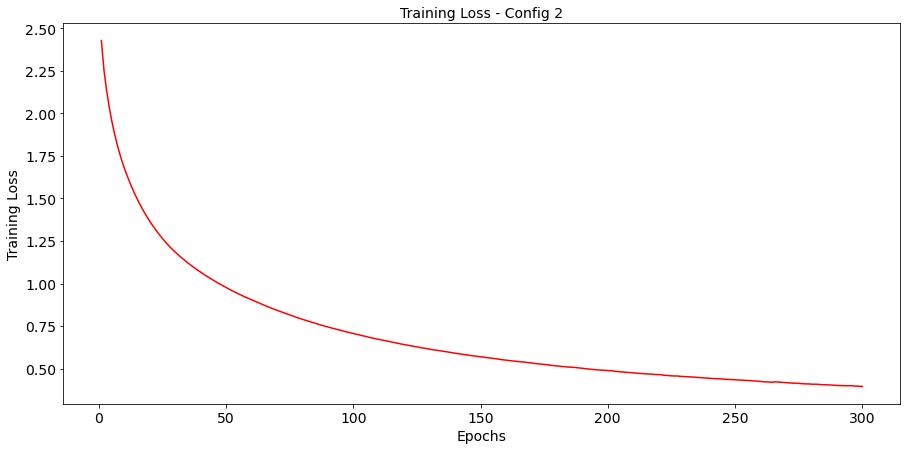

In [46]:
epochs = list (range(1,300+1))
loss = config2_loss
plt.figure(figsize=(15,7))
plt.title('Training Loss - Config 2',fontsize=14)
plt.xlabel('Epochs', size=14)
plt.ylabel('Training Loss', fontsize=14)
plt.tick_params(labelsize=14)
plt.plot(epochs,loss,c='red')

Training Accuracy for Configuration 2

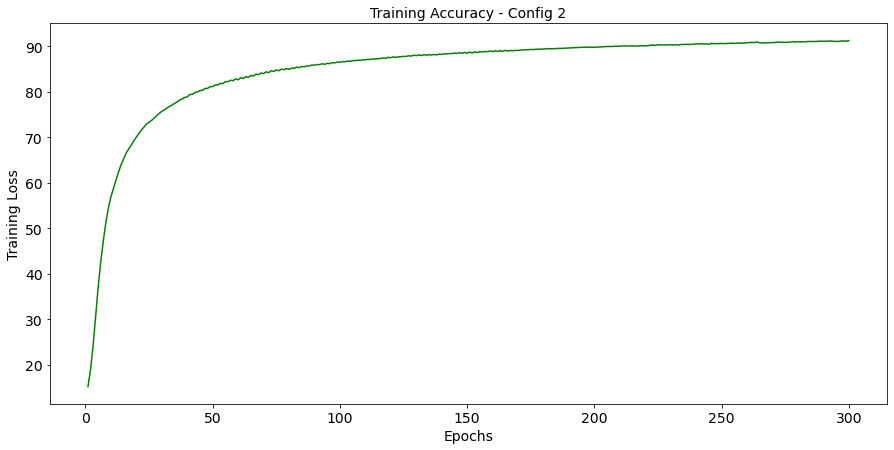

In [47]:
epochs = list(range(1,300+1))
accuracy = config2_accuracy
plt.figure(figsize=(15,7))
plt.title('Training Accuracy - Config 2',fontsize=14)
plt.xlabel('Epochs', size=14)
plt.ylabel('Training Loss', fontsize=14)
plt.tick_params(labelsize=14)
plt.plot(epochs,accuracy,c='green')

Testing for Configuration 2 on VALIDATION DATA

In [48]:
test_config2,pred_config2 = test(config2_w2,config2_b2,config2_w1,config2_b1,X_test,Y_test,sigmodfunc)
config2_testaccuracy = get_acc(test_config2, pred_config2)
print("Testing Accuracy of Configuration 2: {}".format(config2_testaccuracy))
accuracy2 = config2_testaccuracy

Testing Accuracy of Configuration 2: 90.03


CONFIGURATION 3

Neurons=128, Learning Rate=0.03, Epochs=300, Activation=Sigmoid Function

In [49]:
config3_w2,config3_b2,config3_w1,config3_b1,config3_accuracy,config3_loss= train(X_train,Y_train,128,0.03,300,sigmodfunc,sig_deriv)

EPOCH Number --> 1 ===>> Training Loss = 2.2962419893556993
EPOCH NUMBER --> 1 ===>> Training Accuracy = 16.32
EPOCH Number --> 2 ===>> Training Loss = 2.192299607373146
EPOCH NUMBER --> 2 ===>> Training Accuracy = 22.59
EPOCH Number --> 3 ===>> Training Loss = 2.1046813661800763
EPOCH NUMBER --> 3 ===>> Training Accuracy = 28.45
EPOCH Number --> 4 ===>> Training Loss = 2.027261261527486
EPOCH NUMBER --> 4 ===>> Training Accuracy = 33.78
EPOCH Number --> 5 ===>> Training Loss = 1.9592944802104253
EPOCH NUMBER --> 5 ===>> Training Accuracy = 38.59
EPOCH Number --> 6 ===>> Training Loss = 1.8980280782834864
EPOCH NUMBER --> 6 ===>> Training Accuracy = 43.02
EPOCH Number --> 7 ===>> Training Loss = 1.8431108872604403
EPOCH NUMBER --> 7 ===>> Training Accuracy = 46.73
EPOCH Number --> 8 ===>> Training Loss = 1.7932116506312759
EPOCH NUMBER --> 8 ===>> Training Accuracy = 49.99
EPOCH Number --> 9 ===>> Training Loss = 1.7466434396897617
EPOCH NUMBER --> 9 ===>> Training Accuracy = 52.86
EPO

EPOCH Number --> 74 ===>> Training Loss = 0.8246615269367886
EPOCH NUMBER --> 74 ===>> Training Accuracy = 83.9
EPOCH Number --> 75 ===>> Training Loss = 0.819346384299834
EPOCH NUMBER --> 75 ===>> Training Accuracy = 84.08
EPOCH Number --> 76 ===>> Training Loss = 0.8141280697541584
EPOCH NUMBER --> 76 ===>> Training Accuracy = 84.19
EPOCH Number --> 77 ===>> Training Loss = 0.8090202239942355
EPOCH NUMBER --> 77 ===>> Training Accuracy = 84.28
EPOCH Number --> 78 ===>> Training Loss = 0.8040094621782954
EPOCH NUMBER --> 78 ===>> Training Accuracy = 84.36
EPOCH Number --> 79 ===>> Training Loss = 0.7990760610128729
EPOCH NUMBER --> 79 ===>> Training Accuracy = 84.46
EPOCH Number --> 80 ===>> Training Loss = 0.7941835814170464
EPOCH NUMBER --> 80 ===>> Training Accuracy = 84.55
EPOCH Number --> 81 ===>> Training Loss = 0.789343439555193
EPOCH NUMBER --> 81 ===>> Training Accuracy = 84.64
EPOCH Number --> 82 ===>> Training Loss = 0.7845403500066681
EPOCH NUMBER --> 82 ===>> Training Acc

EPOCH Number --> 146 ===>> Training Loss = 0.5865005506503567
EPOCH NUMBER --> 146 ===>> Training Accuracy = 87.81
EPOCH Number --> 147 ===>> Training Loss = 0.5844632397390124
EPOCH NUMBER --> 147 ===>> Training Accuracy = 87.84
EPOCH Number --> 148 ===>> Training Loss = 0.5825282090846666
EPOCH NUMBER --> 148 ===>> Training Accuracy = 87.87
EPOCH Number --> 149 ===>> Training Loss = 0.580539214255559
EPOCH NUMBER --> 149 ===>> Training Accuracy = 87.9
EPOCH Number --> 150 ===>> Training Loss = 0.5786462673042032
EPOCH NUMBER --> 150 ===>> Training Accuracy = 87.95
EPOCH Number --> 151 ===>> Training Loss = 0.5767095127416971
EPOCH NUMBER --> 151 ===>> Training Accuracy = 87.98
EPOCH Number --> 152 ===>> Training Loss = 0.5748401672997482
EPOCH NUMBER --> 152 ===>> Training Accuracy = 87.99
EPOCH Number --> 153 ===>> Training Loss = 0.5729233722241828
EPOCH NUMBER --> 153 ===>> Training Accuracy = 88.01
EPOCH Number --> 154 ===>> Training Loss = 0.5710739571556972
EPOCH NUMBER --> 154

EPOCH Number --> 218 ===>> Training Loss = 0.4831180914366932
EPOCH NUMBER --> 218 ===>> Training Accuracy = 89.34
EPOCH Number --> 219 ===>> Training Loss = 0.48211399116387066
EPOCH NUMBER --> 219 ===>> Training Accuracy = 89.33
EPOCH Number --> 220 ===>> Training Loss = 0.481053050932072
EPOCH NUMBER --> 220 ===>> Training Accuracy = 89.37
EPOCH Number --> 221 ===>> Training Loss = 0.4800422659403541
EPOCH NUMBER --> 221 ===>> Training Accuracy = 89.37
EPOCH Number --> 222 ===>> Training Loss = 0.47897442048926514
EPOCH NUMBER --> 222 ===>> Training Accuracy = 89.43
EPOCH Number --> 223 ===>> Training Loss = 0.47795831242196585
EPOCH NUMBER --> 223 ===>> Training Accuracy = 89.4
EPOCH Number --> 224 ===>> Training Loss = 0.47690424915162244
EPOCH NUMBER --> 224 ===>> Training Accuracy = 89.45
EPOCH Number --> 225 ===>> Training Loss = 0.47588168064546094
EPOCH NUMBER --> 225 ===>> Training Accuracy = 89.43
EPOCH Number --> 226 ===>> Training Loss = 0.4748638157502367
EPOCH NUMBER --

EPOCH Number --> 290 ===>> Training Loss = 0.4235330684920422
EPOCH NUMBER --> 290 ===>> Training Accuracy = 90.23
EPOCH Number --> 291 ===>> Training Loss = 0.4229354602233154
EPOCH NUMBER --> 291 ===>> Training Accuracy = 90.18
EPOCH Number --> 292 ===>> Training Loss = 0.4222591795828737
EPOCH NUMBER --> 292 ===>> Training Accuracy = 90.26
EPOCH Number --> 293 ===>> Training Loss = 0.42167785374476763
EPOCH NUMBER --> 293 ===>> Training Accuracy = 90.18
EPOCH Number --> 294 ===>> Training Loss = 0.42096409240761584
EPOCH NUMBER --> 294 ===>> Training Accuracy = 90.29
EPOCH Number --> 295 ===>> Training Loss = 0.420365999176265
EPOCH NUMBER --> 295 ===>> Training Accuracy = 90.19
EPOCH Number --> 296 ===>> Training Loss = 0.4196376051221087
EPOCH NUMBER --> 296 ===>> Training Accuracy = 90.31
EPOCH Number --> 297 ===>> Training Loss = 0.4190031875248869
EPOCH NUMBER --> 297 ===>> Training Accuracy = 90.22
EPOCH Number --> 298 ===>> Training Loss = 0.4183089684839086
EPOCH NUMBER --> 

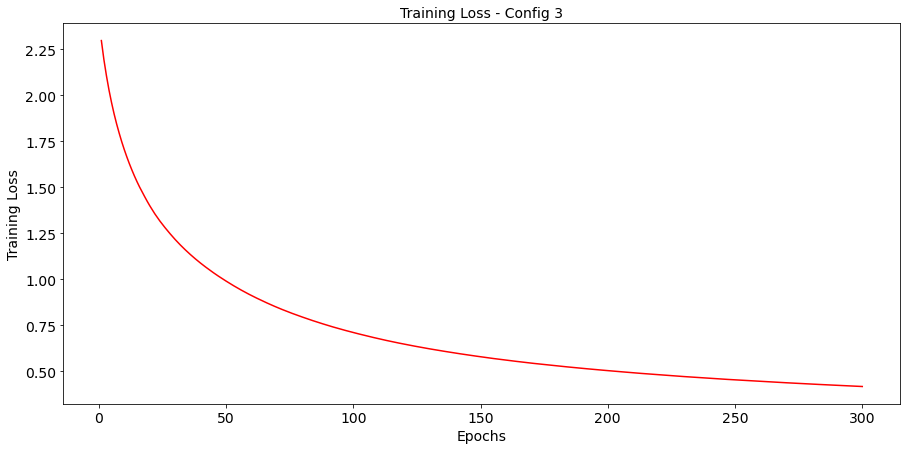

In [50]:
epochs = list (range(1,300+1))
loss = config3_loss
plt.figure(figsize=(15,7))
plt.title('Training Loss - Config 3',fontsize=14)
plt.xlabel('Epochs', size=14)
plt.ylabel('Training Loss', fontsize=14)
plt.tick_params(labelsize=14)
plt.plot(epochs,loss,c='red')

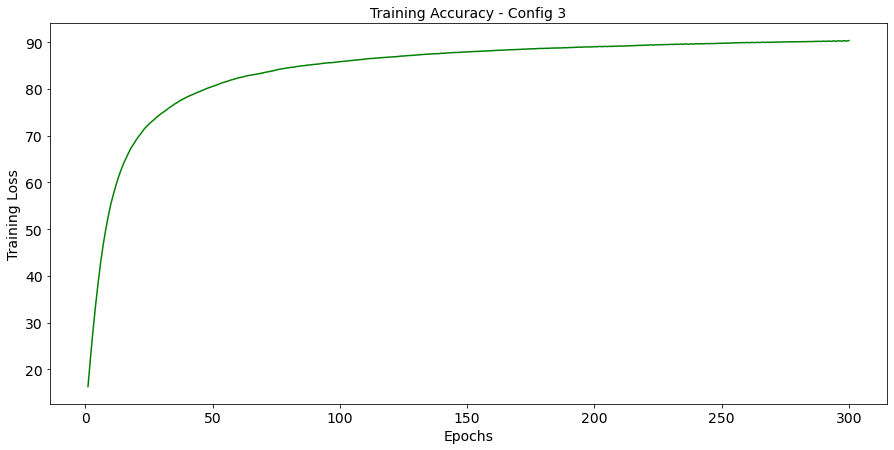

In [51]:
epochs = list(range(1,300+1))
accuracy = config3_accuracy
plt.figure(figsize=(15,7))
plt.title('Training Accuracy - Config 3',fontsize=14)
plt.xlabel('Epochs', size=14)
plt.ylabel('Training Loss', fontsize=14)
plt.tick_params(labelsize=14)
plt.plot(epochs,accuracy,c='green')

In [52]:
test_config3,pred_config3 = test(config3_w2,config3_b2,config3_w1,config3_b1,X_test,Y_test,sigmodfunc)
config3_testaccuracy = get_acc(test_config3, pred_config3)
print("Testing Accuracy of Configuration 3: {}".format(config3_testaccuracy))
accuracy3 = config3_testaccuracy

Testing Accuracy of Configuration 3: 88.85


CONFIGURATION 4

Neurons=128, Learning rate=0.05 Epochs=300 , Activation=sigmoid 

In [53]:
config4_w2,config4_b2,config4_w1,config4_b1,config4_accuracy,config4_loss= train(X_train,Y_train,128,0.05,300,sigmodfunc,sig_deriv)

EPOCH Number --> 1 ===>> Training Loss = 2.3160513873807664
EPOCH NUMBER --> 1 ===>> Training Accuracy = 16.79
EPOCH Number --> 2 ===>> Training Loss = 2.1535528875440693
EPOCH NUMBER --> 2 ===>> Training Accuracy = 23.76
EPOCH Number --> 3 ===>> Training Loss = 2.0329527926378033
EPOCH NUMBER --> 3 ===>> Training Accuracy = 31.81
EPOCH Number --> 4 ===>> Training Loss = 1.934871580732386
EPOCH NUMBER --> 4 ===>> Training Accuracy = 39.09
EPOCH Number --> 5 ===>> Training Loss = 1.853960288484944
EPOCH NUMBER --> 5 ===>> Training Accuracy = 45.15
EPOCH Number --> 6 ===>> Training Loss = 1.7832232791317935
EPOCH NUMBER --> 6 ===>> Training Accuracy = 49.9
EPOCH Number --> 7 ===>> Training Loss = 1.719563755173926
EPOCH NUMBER --> 7 ===>> Training Accuracy = 53.91
EPOCH Number --> 8 ===>> Training Loss = 1.6611724643183063
EPOCH NUMBER --> 8 ===>> Training Accuracy = 57.75
EPOCH Number --> 9 ===>> Training Loss = 1.607371869274167
EPOCH NUMBER --> 9 ===>> Training Accuracy = 60.64
EPOCH 

EPOCH Number --> 74 ===>> Training Loss = 0.6352936020634471
EPOCH NUMBER --> 74 ===>> Training Accuracy = 87.07
EPOCH Number --> 75 ===>> Training Loss = 0.6309173715102283
EPOCH NUMBER --> 75 ===>> Training Accuracy = 87.17
EPOCH Number --> 76 ===>> Training Loss = 0.6266348259007287
EPOCH NUMBER --> 76 ===>> Training Accuracy = 87.24
EPOCH Number --> 77 ===>> Training Loss = 0.6224841732626312
EPOCH NUMBER --> 77 ===>> Training Accuracy = 87.27
EPOCH Number --> 78 ===>> Training Loss = 0.6182348787571783
EPOCH NUMBER --> 78 ===>> Training Accuracy = 87.34
EPOCH Number --> 79 ===>> Training Loss = 0.6142194385216995
EPOCH NUMBER --> 79 ===>> Training Accuracy = 87.43
EPOCH Number --> 80 ===>> Training Loss = 0.6101962889792272
EPOCH NUMBER --> 80 ===>> Training Accuracy = 87.43
EPOCH Number --> 81 ===>> Training Loss = 0.606347292170348
EPOCH NUMBER --> 81 ===>> Training Accuracy = 87.52
EPOCH Number --> 82 ===>> Training Loss = 0.6026059362621871
EPOCH NUMBER --> 82 ===>> Training A

EPOCH Number --> 146 ===>> Training Loss = 0.4531435209485284
EPOCH NUMBER --> 146 ===>> Training Accuracy = 89.83
EPOCH Number --> 147 ===>> Training Loss = 0.451742331071493
EPOCH NUMBER --> 147 ===>> Training Accuracy = 89.9
EPOCH Number --> 148 ===>> Training Loss = 0.45023739917649536
EPOCH NUMBER --> 148 ===>> Training Accuracy = 89.85
EPOCH Number --> 149 ===>> Training Loss = 0.44887193681157583
EPOCH NUMBER --> 149 ===>> Training Accuracy = 89.93
EPOCH Number --> 150 ===>> Training Loss = 0.4473751417513544
EPOCH NUMBER --> 150 ===>> Training Accuracy = 89.89
EPOCH Number --> 151 ===>> Training Loss = 0.445924419450135
EPOCH NUMBER --> 151 ===>> Training Accuracy = 89.97
EPOCH Number --> 152 ===>> Training Loss = 0.4444845068230431
EPOCH NUMBER --> 152 ===>> Training Accuracy = 89.95
EPOCH Number --> 153 ===>> Training Loss = 0.4430650891216218
EPOCH NUMBER --> 153 ===>> Training Accuracy = 90.01
EPOCH Number --> 154 ===>> Training Loss = 0.4417094303027903
EPOCH NUMBER --> 15

EPOCH Number --> 218 ===>> Training Loss = 0.376840075913964
EPOCH NUMBER --> 218 ===>> Training Accuracy = 91.02
EPOCH Number --> 219 ===>> Training Loss = 0.37604195083853126
EPOCH NUMBER --> 219 ===>> Training Accuracy = 91.07
EPOCH Number --> 220 ===>> Training Loss = 0.3753235993057272
EPOCH NUMBER --> 220 ===>> Training Accuracy = 91.04
EPOCH Number --> 221 ===>> Training Loss = 0.37448224986998896
EPOCH NUMBER --> 221 ===>> Training Accuracy = 91.11
EPOCH Number --> 222 ===>> Training Loss = 0.37381918028871913
EPOCH NUMBER --> 222 ===>> Training Accuracy = 91.08
EPOCH Number --> 223 ===>> Training Loss = 0.3731479714516807
EPOCH NUMBER --> 223 ===>> Training Accuracy = 91.16
EPOCH Number --> 224 ===>> Training Loss = 0.3725702985698108
EPOCH NUMBER --> 224 ===>> Training Accuracy = 91.11
EPOCH Number --> 225 ===>> Training Loss = 0.37194851212652064
EPOCH NUMBER --> 225 ===>> Training Accuracy = 91.16
EPOCH Number --> 226 ===>> Training Loss = 0.3712568922610144
EPOCH NUMBER --

EPOCH Number --> 290 ===>> Training Loss = 0.3322655733575343
EPOCH NUMBER --> 290 ===>> Training Accuracy = 91.84
EPOCH Number --> 291 ===>> Training Loss = 0.3320281090133037
EPOCH NUMBER --> 291 ===>> Training Accuracy = 91.89
EPOCH Number --> 292 ===>> Training Loss = 0.3313587240797877
EPOCH NUMBER --> 292 ===>> Training Accuracy = 91.87
EPOCH Number --> 293 ===>> Training Loss = 0.33098432722267224
EPOCH NUMBER --> 293 ===>> Training Accuracy = 91.91
EPOCH Number --> 294 ===>> Training Loss = 0.32992174569564914
EPOCH NUMBER --> 294 ===>> Training Accuracy = 91.89
EPOCH Number --> 295 ===>> Training Loss = 0.3294753641774233
EPOCH NUMBER --> 295 ===>> Training Accuracy = 91.94
EPOCH Number --> 296 ===>> Training Loss = 0.3289322186324511
EPOCH NUMBER --> 296 ===>> Training Accuracy = 91.9
EPOCH Number --> 297 ===>> Training Loss = 0.3283993633980016
EPOCH NUMBER --> 297 ===>> Training Accuracy = 91.98
EPOCH Number --> 298 ===>> Training Loss = 0.32801579531540825
EPOCH NUMBER -->

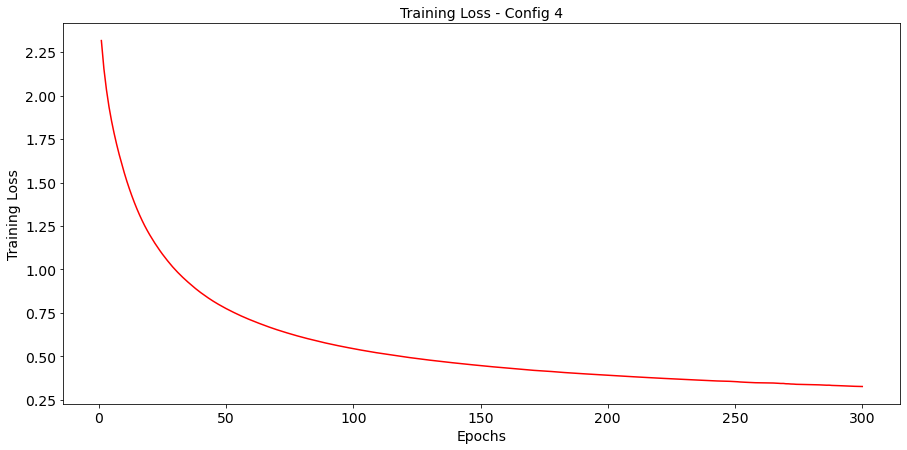

In [54]:
epochs = list (range(1,300+1))
loss = config4_loss
plt.figure(figsize=(15,7))
plt.title('Training Loss - Config 4',fontsize=14)
plt.xlabel('Epochs', size=14)
plt.ylabel('Training Loss', fontsize=14)
plt.tick_params(labelsize=14)
plt.plot(epochs,loss,c='red')

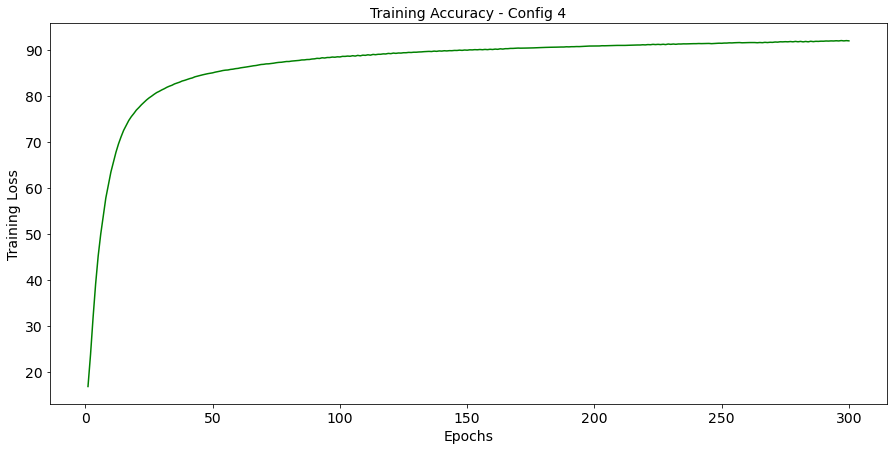

In [55]:
epochs = list(range(1,300+1))
accuracy = config4_accuracy
plt.figure(figsize=(15,7))
plt.title('Training Accuracy - Config 4',fontsize=14)
plt.xlabel('Epochs', size=14)
plt.ylabel('Training Loss', fontsize=14)
plt.tick_params(labelsize=14)
plt.plot(epochs,accuracy,c='green')

In [56]:
test_config4,pred_config4 = test(config4_w2,config4_b2,config4_w1,config4_b1,X_test,Y_test,sigmodfunc)
config4_testaccuracy = get_acc(test_config4, pred_config4)
print("Testing Accuracy of Configuration 4: {}".format(config4_testaccuracy))
accuracy4 = config4_testaccuracy

Testing Accuracy of Configuration 4: 90.49


CONFIGURATION 5

Neurons=128 Learning Rate=0.05 Epochs=300, Activation function= Tanh

In [35]:
config5_w2,config5_b2,config5_w1,config5_b1,config5_accuracy,config5_loss= train(X_train,Y_train,128,0.05,300,tanhfunc,tanh_deriv)

EPOCH Number --> 1 ===>> Training Loss = 2.16888500607372
EPOCH NUMBER --> 1 ===>> Training Accuracy = 24.32
EPOCH Number --> 2 ===>> Training Loss = 1.793915553249019
EPOCH NUMBER --> 2 ===>> Training Accuracy = 39.6
EPOCH Number --> 3 ===>> Training Loss = 1.561340110418876
EPOCH NUMBER --> 3 ===>> Training Accuracy = 51.06
EPOCH Number --> 4 ===>> Training Loss = 1.3931075062664364
EPOCH NUMBER --> 4 ===>> Training Accuracy = 57.53
EPOCH Number --> 5 ===>> Training Loss = 1.2706325859909633
EPOCH NUMBER --> 5 ===>> Training Accuracy = 63.07
EPOCH Number --> 6 ===>> Training Loss = 1.175601514825966
EPOCH NUMBER --> 6 ===>> Training Accuracy = 65.68
EPOCH Number --> 7 ===>> Training Loss = 1.097791611235816
EPOCH NUMBER --> 7 ===>> Training Accuracy = 69.05
EPOCH Number --> 8 ===>> Training Loss = 1.0211926573674441
EPOCH NUMBER --> 8 ===>> Training Accuracy = 71.41
EPOCH Number --> 9 ===>> Training Loss = 0.9635219644597232
EPOCH NUMBER --> 9 ===>> Training Accuracy = 73.77
EPOCH Nu

EPOCH Number --> 74 ===>> Training Loss = 0.385061460234931
EPOCH NUMBER --> 74 ===>> Training Accuracy = 89.93
EPOCH Number --> 75 ===>> Training Loss = 0.3839753758938671
EPOCH NUMBER --> 75 ===>> Training Accuracy = 89.94
EPOCH Number --> 76 ===>> Training Loss = 0.3820256987600702
EPOCH NUMBER --> 76 ===>> Training Accuracy = 89.99
EPOCH Number --> 77 ===>> Training Loss = 0.3782402735228626
EPOCH NUMBER --> 77 ===>> Training Accuracy = 90.07
EPOCH Number --> 78 ===>> Training Loss = 0.3769998476461488
EPOCH NUMBER --> 78 ===>> Training Accuracy = 90.08
EPOCH Number --> 79 ===>> Training Loss = 0.37776094624148193
EPOCH NUMBER --> 79 ===>> Training Accuracy = 89.96
EPOCH Number --> 80 ===>> Training Loss = 0.37415472182631454
EPOCH NUMBER --> 80 ===>> Training Accuracy = 90.11
EPOCH Number --> 81 ===>> Training Loss = 0.3730017755557745
EPOCH NUMBER --> 81 ===>> Training Accuracy = 90.12
EPOCH Number --> 82 ===>> Training Loss = 0.3702354356286609
EPOCH NUMBER --> 82 ===>> Training

EPOCH Number --> 146 ===>> Training Loss = 0.29518021113662996
EPOCH NUMBER --> 146 ===>> Training Accuracy = 92.16
EPOCH Number --> 147 ===>> Training Loss = 0.29313805732445736
EPOCH NUMBER --> 147 ===>> Training Accuracy = 92.27
EPOCH Number --> 148 ===>> Training Loss = 0.29364448457846076
EPOCH NUMBER --> 148 ===>> Training Accuracy = 92.18
EPOCH Number --> 149 ===>> Training Loss = 0.2911877287907644
EPOCH NUMBER --> 149 ===>> Training Accuracy = 92.26
EPOCH Number --> 150 ===>> Training Loss = 0.2894031440806138
EPOCH NUMBER --> 150 ===>> Training Accuracy = 92.26
EPOCH Number --> 151 ===>> Training Loss = 0.2875174805300262
EPOCH NUMBER --> 151 ===>> Training Accuracy = 92.4
EPOCH Number --> 152 ===>> Training Loss = 0.2897607894915544
EPOCH NUMBER --> 152 ===>> Training Accuracy = 92.2
EPOCH Number --> 153 ===>> Training Loss = 0.28764748594415396
EPOCH NUMBER --> 153 ===>> Training Accuracy = 92.33
EPOCH Number --> 154 ===>> Training Loss = 0.287905399660027
EPOCH NUMBER --> 

EPOCH Number --> 218 ===>> Training Loss = 0.24968995527563606
EPOCH NUMBER --> 218 ===>> Training Accuracy = 93.32
EPOCH Number --> 219 ===>> Training Loss = 0.24919070328853715
EPOCH NUMBER --> 219 ===>> Training Accuracy = 93.32
EPOCH Number --> 220 ===>> Training Loss = 0.25171063421732437
EPOCH NUMBER --> 220 ===>> Training Accuracy = 93.15
EPOCH Number --> 221 ===>> Training Loss = 0.2502129412298991
EPOCH NUMBER --> 221 ===>> Training Accuracy = 93.25
EPOCH Number --> 222 ===>> Training Loss = 0.24935745563525213
EPOCH NUMBER --> 222 ===>> Training Accuracy = 93.37
EPOCH Number --> 223 ===>> Training Loss = 0.24995335014714676
EPOCH NUMBER --> 223 ===>> Training Accuracy = 93.25
EPOCH Number --> 224 ===>> Training Loss = 0.2488181524147824
EPOCH NUMBER --> 224 ===>> Training Accuracy = 93.28
EPOCH Number --> 225 ===>> Training Loss = 0.24695239278557043
EPOCH NUMBER --> 225 ===>> Training Accuracy = 93.35
EPOCH Number --> 226 ===>> Training Loss = 0.2453333341305074
EPOCH NUMBER

EPOCH Number --> 289 ===>> Training Loss = 0.22458010143232301
EPOCH NUMBER --> 289 ===>> Training Accuracy = 93.9
EPOCH Number --> 290 ===>> Training Loss = 0.2225503333671014
EPOCH NUMBER --> 290 ===>> Training Accuracy = 94.05
EPOCH Number --> 291 ===>> Training Loss = 0.22459641762176594
EPOCH NUMBER --> 291 ===>> Training Accuracy = 93.91
EPOCH Number --> 292 ===>> Training Loss = 0.22425839575731737
EPOCH NUMBER --> 292 ===>> Training Accuracy = 93.95
EPOCH Number --> 293 ===>> Training Loss = 0.22071381106197008
EPOCH NUMBER --> 293 ===>> Training Accuracy = 94.03
EPOCH Number --> 294 ===>> Training Loss = 0.22070925631085306
EPOCH NUMBER --> 294 ===>> Training Accuracy = 94.09
EPOCH Number --> 295 ===>> Training Loss = 0.22018119136986977
EPOCH NUMBER --> 295 ===>> Training Accuracy = 94.04
EPOCH Number --> 296 ===>> Training Loss = 0.2196101196271366
EPOCH NUMBER --> 296 ===>> Training Accuracy = 94.1
EPOCH Number --> 297 ===>> Training Loss = 0.22203003864268855
EPOCH NUMBER 

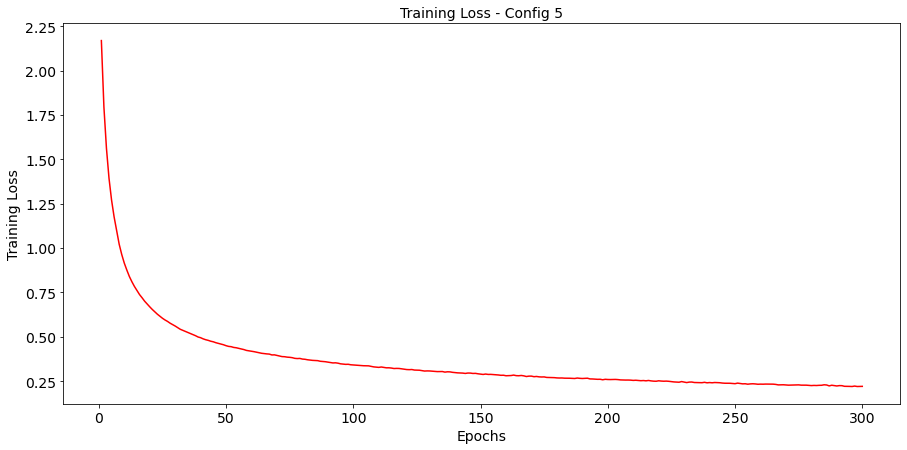

In [37]:
epochs = list (range(1,300+1))
loss = config5_loss
plt.figure(figsize=(15,7))
plt.title('Training Loss - Config 5',fontsize=14)
plt.xlabel('Epochs', size=14)
plt.ylabel('Training Loss', fontsize=14)
plt.tick_params(labelsize=14)
plt.plot(epochs,loss,c='red')

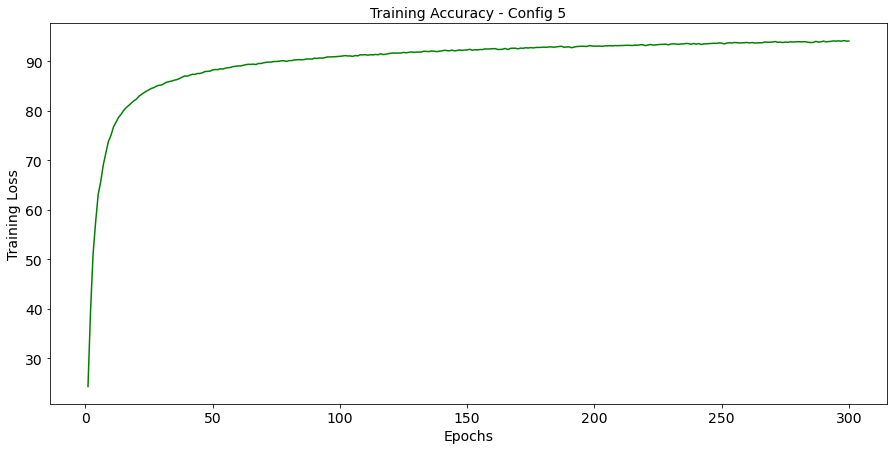

In [38]:
epochs = list(range(1,300+1))
accuracy = config5_accuracy
plt.figure(figsize=(15,7))
plt.title('Training Accuracy - Config 5',fontsize=14)
plt.xlabel('Epochs', size=14)
plt.ylabel('Training Loss', fontsize=14)
plt.tick_params(labelsize=14)
plt.plot(epochs,accuracy,c='green')

VALIDATION DATA TESTING on Configuration 5

In [39]:
test_config5,pred_config5 = test(config5_w2,config5_b2,config5_w1,config5_b1,X_test,Y_test,tanhfunc)
config5_testaccuracy = get_acc(test_config5, pred_config5)
print("Testing Accuracy of Configuration 5: {}".format(config5_testaccuracy))
accuracy5 = config5_testaccuracy

Testing Accuracy of Configuration 5: 91.63


In [57]:
print("Accuracy of Configuration 1 : {}".format(accuracy1))
print("Accuracy of Configuration 2 : {}".format(accuracy2))
print("Accuracy of Configuration 3 : {}".format(accuracy3))
print("Accuracy of Configuration 4 : {}".format(accuracy4))
print("Accuracy of Configuration 5 : {}".format(accuracy5))

Accuracy of Configuration 1 : 88.92
Accuracy of Configuration 2 : 90.03
Accuracy of Configuration 3 : 88.85
Accuracy of Configuration 4 : 90.49
Accuracy of Configuration 5 : 91.63


If we observe all the loss plots we can clearly see that for Configuration 5, the curve is very steep and we achived 91.63% accuracy on our test data set which highest therfore when we prefer to use tanH activation function, we can deduce that there is always a significant decrease in training loss , due to this the model converges to better solution in less epochs.
Configuration 2 and 4 showed good performance than 1 since it learns slowly than all the others.

Therfore, we will choose configuration 5 to achieve good results with more number of neurons in less epochs.

Q. 3 A)  Convergence Criteria : Here for each different configuration, testing of model fetches updated weights and runs over validation dataset and succesfully returns predictions over testing labels.  Nextly, model takes armax of all the outputs generated my model and the accuracy is calculated. In each iteration of model loss and gradient is calculated which is back propogated using the backPro() function, this in turn learns the weights for 300 iterations. Loss is minimized and performance of model is increased. 

Q 3 A) Implementation: 

Here a Neural Network is implemented with just one hidden layer. We have converted input files into Numpy array and then we have reshaped the dataset into an array of [60000 , 784]. Datset is split into 70-30 using scikit learn train test split. 

We have initialised the network with radom weights and we have bias as zero. In training model learns based on training data. Weights and bias get initialised , then we perfrom feed forward operation. Dot products of weights and inputs is calculated and bias is added to it. 

Nextly, this output is passed to activation function, sigmoid or tanh depending upon the configuration . The output of current stage is feed-forwarded to next layer. Dot product of this output and new;y tuned weights is computed and bias is added. This time we pass this output to softmax function. Due to this we get 10 predictions for every instance.
Then we calculate loss at each iteration of model, we are taking cross entropy loss for our model. We calulate the change in loss of our model for that iteration with respect toi gradient. This gradient is backpropogated to update the weights accordingly so that loss is minimised in next iteration. 
We calculate accuracy by taking armax for each output, model basically learns from the loss and accuracy increases.

Question 4

Our best configuration is 5th one hence we will train it with 60000 training samples and we will evaluate using entire test data of 10000 instances. 

In [28]:
config51_w2,config51_b2,config51_w1,config51_b1,config51_accuracy,config51_loss= train(X_traindata,Y_trainlabel,128,0.05,300,tanhfunc,tanh_deriv)

EPOCH Number --> 1 ===>> Training Loss = 2.164545038732691
EPOCH NUMBER --> 1 ===>> Training Accuracy = 22.98
EPOCH Number --> 2 ===>> Training Loss = 1.8426977529778263
EPOCH NUMBER --> 2 ===>> Training Accuracy = 36.61
EPOCH Number --> 3 ===>> Training Loss = 1.6139499560383077
EPOCH NUMBER --> 3 ===>> Training Accuracy = 50.04
EPOCH Number --> 4 ===>> Training Loss = 1.4470247461892167
EPOCH NUMBER --> 4 ===>> Training Accuracy = 57.44
EPOCH Number --> 5 ===>> Training Loss = 1.3183972512205189
EPOCH NUMBER --> 5 ===>> Training Accuracy = 62.81
EPOCH Number --> 6 ===>> Training Loss = 1.216523136544167
EPOCH NUMBER --> 6 ===>> Training Accuracy = 66.56
EPOCH Number --> 7 ===>> Training Loss = 1.1344975867831526
EPOCH NUMBER --> 7 ===>> Training Accuracy = 69.24
EPOCH Number --> 8 ===>> Training Loss = 1.0667265680441997
EPOCH NUMBER --> 8 ===>> Training Accuracy = 71.46
EPOCH Number --> 9 ===>> Training Loss = 1.0095876530663732
EPOCH NUMBER --> 9 ===>> Training Accuracy = 73.12
EPO

EPOCH Number --> 74 ===>> Training Loss = 0.39472092196854347
EPOCH NUMBER --> 74 ===>> Training Accuracy = 89.66
EPOCH Number --> 75 ===>> Training Loss = 0.3925663056365568
EPOCH NUMBER --> 75 ===>> Training Accuracy = 89.72
EPOCH Number --> 76 ===>> Training Loss = 0.38995463921370443
EPOCH NUMBER --> 76 ===>> Training Accuracy = 89.78
EPOCH Number --> 77 ===>> Training Loss = 0.3884409856778813
EPOCH NUMBER --> 77 ===>> Training Accuracy = 89.8
EPOCH Number --> 78 ===>> Training Loss = 0.3877757798401812
EPOCH NUMBER --> 78 ===>> Training Accuracy = 89.77
EPOCH Number --> 79 ===>> Training Loss = 0.3854739203208997
EPOCH NUMBER --> 79 ===>> Training Accuracy = 89.83
EPOCH Number --> 80 ===>> Training Loss = 0.38434325241916395
EPOCH NUMBER --> 80 ===>> Training Accuracy = 89.83
EPOCH Number --> 81 ===>> Training Loss = 0.3826096246006192
EPOCH NUMBER --> 81 ===>> Training Accuracy = 89.88
EPOCH Number --> 82 ===>> Training Loss = 0.3806627256073936
EPOCH NUMBER --> 82 ===>> Trainin

EPOCH Number --> 146 ===>> Training Loss = 0.3078049245679267
EPOCH NUMBER --> 146 ===>> Training Accuracy = 91.78
EPOCH Number --> 147 ===>> Training Loss = 0.30660953291479554
EPOCH NUMBER --> 147 ===>> Training Accuracy = 91.76
EPOCH Number --> 148 ===>> Training Loss = 0.3054387358667474
EPOCH NUMBER --> 148 ===>> Training Accuracy = 91.8
EPOCH Number --> 149 ===>> Training Loss = 0.30523106134158934
EPOCH NUMBER --> 149 ===>> Training Accuracy = 91.86
EPOCH Number --> 150 ===>> Training Loss = 0.30256755792315754
EPOCH NUMBER --> 150 ===>> Training Accuracy = 91.92
EPOCH Number --> 151 ===>> Training Loss = 0.30238946752003254
EPOCH NUMBER --> 151 ===>> Training Accuracy = 91.91
EPOCH Number --> 152 ===>> Training Loss = 0.3013992753184901
EPOCH NUMBER --> 152 ===>> Training Accuracy = 91.91
EPOCH Number --> 153 ===>> Training Loss = 0.30071327342375126
EPOCH NUMBER --> 153 ===>> Training Accuracy = 91.96
EPOCH Number --> 154 ===>> Training Loss = 0.29971450445094017
EPOCH NUMBER 

EPOCH Number --> 218 ===>> Training Loss = 0.2631594791756783
EPOCH NUMBER --> 218 ===>> Training Accuracy = 92.96
EPOCH Number --> 219 ===>> Training Loss = 0.26192002150801563
EPOCH NUMBER --> 219 ===>> Training Accuracy = 92.97
EPOCH Number --> 220 ===>> Training Loss = 0.26383953644836167
EPOCH NUMBER --> 220 ===>> Training Accuracy = 92.95
EPOCH Number --> 221 ===>> Training Loss = 0.2634575010016158
EPOCH NUMBER --> 221 ===>> Training Accuracy = 92.91
EPOCH Number --> 222 ===>> Training Loss = 0.2627607531397149
EPOCH NUMBER --> 222 ===>> Training Accuracy = 92.85
EPOCH Number --> 223 ===>> Training Loss = 0.2625722877020435
EPOCH NUMBER --> 223 ===>> Training Accuracy = 92.87
EPOCH Number --> 224 ===>> Training Loss = 0.2613554812574095
EPOCH NUMBER --> 224 ===>> Training Accuracy = 93.02
EPOCH Number --> 225 ===>> Training Loss = 0.2606082926135149
EPOCH NUMBER --> 225 ===>> Training Accuracy = 92.97
EPOCH Number --> 226 ===>> Training Loss = 0.2595907210825062
EPOCH NUMBER -->

EPOCH Number --> 289 ===>> Training Loss = 0.23845708010509808
EPOCH NUMBER --> 289 ===>> Training Accuracy = 93.56
EPOCH Number --> 290 ===>> Training Loss = 0.23731826625417393
EPOCH NUMBER --> 290 ===>> Training Accuracy = 93.59
EPOCH Number --> 291 ===>> Training Loss = 0.237866594505739
EPOCH NUMBER --> 291 ===>> Training Accuracy = 93.62
EPOCH Number --> 292 ===>> Training Loss = 0.2375088407889573
EPOCH NUMBER --> 292 ===>> Training Accuracy = 93.54
EPOCH Number --> 293 ===>> Training Loss = 0.2380733784910869
EPOCH NUMBER --> 293 ===>> Training Accuracy = 93.53
EPOCH Number --> 294 ===>> Training Loss = 0.2374584020650202
EPOCH NUMBER --> 294 ===>> Training Accuracy = 93.53
EPOCH Number --> 295 ===>> Training Loss = 0.23767065663817694
EPOCH NUMBER --> 295 ===>> Training Accuracy = 93.55
EPOCH Number --> 296 ===>> Training Loss = 0.2363292260875751
EPOCH NUMBER --> 296 ===>> Training Accuracy = 93.57
EPOCH Number --> 297 ===>> Training Loss = 0.23686816534923694
EPOCH NUMBER --

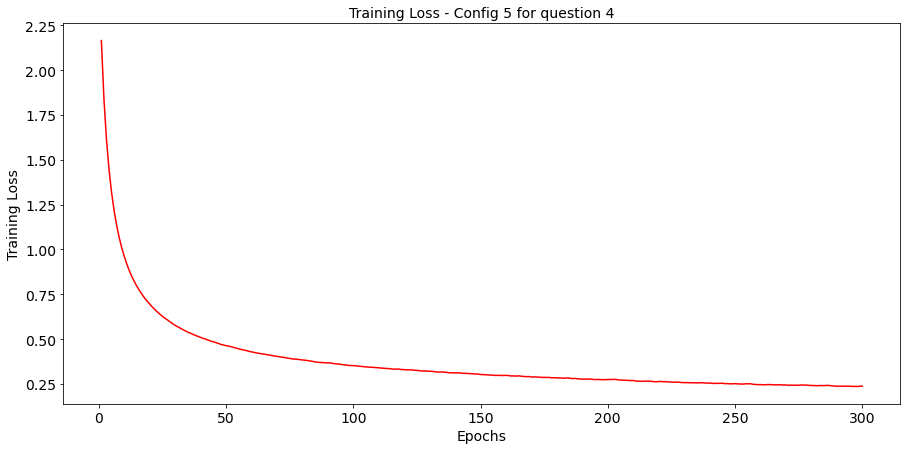

In [36]:
epochs = list (range(1,300+1))
loss = config51_loss
plt.figure(figsize=(15,7))
plt.title('Training Loss - Config 5 for question 4',fontsize=14)
plt.xlabel('Epochs', size=14)
plt.ylabel('Training Loss', fontsize=14)
plt.tick_params(labelsize=14)
plt.plot(epochs,loss,c='red')

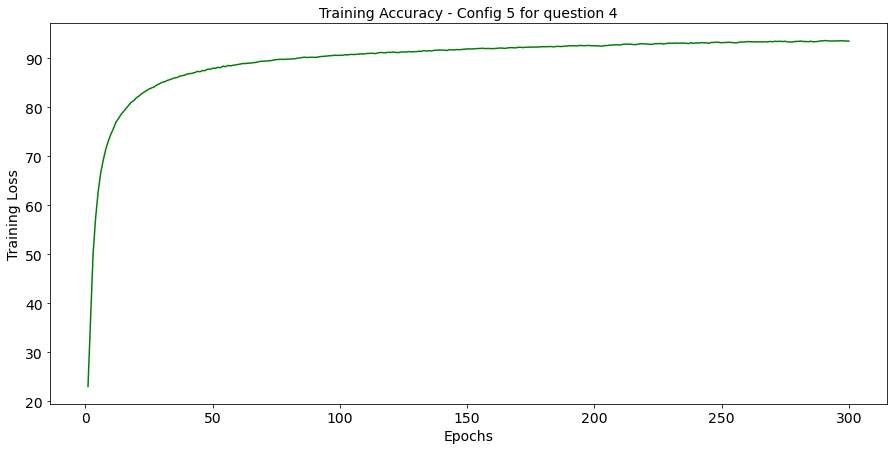

In [30]:
epochs = list(range(1,300+1))
accuracy = config51_accuracy
plt.figure(figsize=(15,7))
plt.title('Training Accuracy - Config 5 for question 4',fontsize=14)
plt.xlabel('Epochs', size=14)
plt.ylabel('Training Loss', fontsize=14)
plt.tick_params(labelsize=14)
plt.plot(epochs,accuracy,c='green')

Now testing using entire testdata

In [34]:
test_config51,pred_config51 = test(config51_w2,config51_b2,config51_w1,config51_b1,X_testdata,Y_testlabel,tanhfunc)
config51_testaccuracy = get_acc(test_config51, pred_config51)
print("Testing Accuracy of Configuration 5: {}".format(config51_testaccuracy))
accuracy51 = config51_testaccuracy

Testing Accuracy of Configuration 5: 92.09


As we can see we get 92.09% of total accuracy on entire data set. With a learning rate of 0.05 and 128 neurons. With Tanh activation function we have best neural network configuration and We have evaluated our model on entire dataset.(Required in question 4)

For question 3 B)

BASELINE MODEL =====>> PERCEPTRON

In [526]:
def put(a):
    return npy.hstack((npy.ones((a.shape[0], 1), dtype=int), a))

In [527]:
X_traindata=put(X_traindata)
X_testdata=put(X_testdata)

In [528]:
X_traindata.shape, X_testdata.shape

((60000, 785), (10000, 785))

In [529]:
def perceptron_train(X_t, Y_t):
    dp = npy.ndarray(10,dtype=npy.float32)
    w = npy.zeros((10, X_t.shape[1]), dtype=npy.float32)
    n = 300
    alpha = 0.05
    acc_list=[]
    t=[]
    for i in range(n):
        c=0
        for j in range(X_t.shape[0]):
            for k in range(10):
                dp[k]=npy.dot(X_t[j],w[k])
                
            ip = Y_t[j]
            max = npy.argmax(dp, axis=None)
            Yp = max
            if(Yp != Y_t[i]):
                w[max]= w[max] - (alpha*X_t[i])
                w[ip]= w[ip] + alpha*X_t[i]
            elif(Yp == Y_t[i]):
                c=c+1
        acc= round(((c / Y_t.shape[0])*100),2)    
        print("Epoch number {} and accuracy is {}" .format((i+1), acc))
        acc_list.append(acc)
        t.append(c)
    return w

In [530]:
def perceptron_test(X_t, w):
    yp=[]
    a=[]
    a=npy.dot(X_t, w.T)
    for i in range(a.shape[0]):
        yp.append(npy.argmax(a[i]))
    return yp

In [531]:
Y_trainNew.shape, X_traindata.shape

((60000,), (60000, 785))

In [532]:
weight = perceptron_train(X_traindata, Y_trainNew)

Epoch number 1 and accuracy is 100.0
Epoch number 2 and accuracy is 99.54
Epoch number 3 and accuracy is 99.91
Epoch number 4 and accuracy is 99.96
Epoch number 5 and accuracy is 99.56
Epoch number 6 and accuracy is 99.96
Epoch number 7 and accuracy is 97.79
Epoch number 8 and accuracy is 98.68
Epoch number 9 and accuracy is 92.91
Epoch number 10 and accuracy is 96.8
Epoch number 11 and accuracy is 96.59
Epoch number 12 and accuracy is 99.39
Epoch number 13 and accuracy is 89.17
Epoch number 14 and accuracy is 91.26
Epoch number 15 and accuracy is 70.3
Epoch number 16 and accuracy is 87.98
Epoch number 17 and accuracy is 93.76
Epoch number 18 and accuracy is 91.72
Epoch number 19 and accuracy is 94.22
Epoch number 20 and accuracy is 89.68
Epoch number 21 and accuracy is 80.97
Epoch number 22 and accuracy is 68.49
Epoch number 23 and accuracy is 93.16
Epoch number 24 and accuracy is 53.66
Epoch number 25 and accuracy is 62.7
Epoch number 26 and accuracy is 74.06
Epoch number 27 and accu

Epoch number 215 and accuracy is 12.96
Epoch number 216 and accuracy is 12.89
Epoch number 217 and accuracy is 10.81
Epoch number 218 and accuracy is 12.5
Epoch number 219 and accuracy is 10.38
Epoch number 220 and accuracy is 15.83
Epoch number 221 and accuracy is 11.82
Epoch number 222 and accuracy is 11.36
Epoch number 223 and accuracy is 13.43
Epoch number 224 and accuracy is 12.38
Epoch number 225 and accuracy is 11.94
Epoch number 226 and accuracy is 13.8
Epoch number 227 and accuracy is 11.77
Epoch number 228 and accuracy is 17.22
Epoch number 229 and accuracy is 11.35
Epoch number 230 and accuracy is 10.65
Epoch number 231 and accuracy is 11.73
Epoch number 232 and accuracy is 12.07
Epoch number 233 and accuracy is 11.26
Epoch number 234 and accuracy is 12.11
Epoch number 235 and accuracy is 12.06
Epoch number 236 and accuracy is 11.01
Epoch number 237 and accuracy is 13.57
Epoch number 238 and accuracy is 11.39
Epoch number 239 and accuracy is 10.04
Epoch number 240 and accura

In [536]:
prediction_perceptron=perceptron_test(X_traindata,weight)

In [537]:
t=0
for i in range(Y_trainNew.shape[0]):
    if prediction_perceptron[i]==Y_trainNew[i]:
        t=t+1
print("Correct predictions:", t)
print("Accuracy", accuracy_score(Y_trainNew,prediction_perceptron)*100)

Correct predictions: 37436
Accuracy 62.39333333333333


In [538]:
testing_pred = perceptron_test(X_testdata,weight)

In [539]:
t=0
for i in range(Y_testlabel.shape[0]):
    if testing_pred[i]==Y_testlabel[i]:
        t=t+1
print("Correct predictions:", t)
print("Accuracy", accuracy_score(Y_testlabel,testing_pred)*100)

Correct predictions: 6221
Accuracy 62.21


Comparison:

As we can see from accuracy Neural Network Classifier worked really well on our Test data. We achieved accuracy of more than 90% in Neural Network Classifier model.

Perceptron performed really bad as it is used to classify only linearly seperable data. The weights are updated in linear pattern.

Whereas Neural network can classify linearly inseperable data using hidden layer neurons and hence it can handle complex data. 

As more hidden layers are used in Neural network the model becomes more complex but it improves performance and is able to handle various datsets. 

Question 3 . B) Validate the implementation with XOR DATA using 5th Configuration:

INPUT SEQUENCES FOR XOR

In [58]:
X_val = npy.array([[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],[1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],[1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]])

LABEL SEQUENCES FOR XOR

In [59]:
Y_val = npy.array([0,1,1,0,1,0,0,1,1,0,0,1,0,1,1,0])

In [60]:
X_trainXOR , X_testXOR, Y_trainXOR, Y_testXOR = train_test_split(X_val, Y_val, test_size=0.3, random_state=42)

In [61]:
X_trainXOR.shape, Y_trainXOR.shape

((11, 4), (11,))

In [62]:
Y_trainXOR = pd.get_dummies(Y_trainXOR)
Y_trainXOR = npy.array(Y_trainXOR)

In [63]:
def training(X, Y, neu, lrt, n , acf, derf):
    hNeu=neu
    ip=X.shape[1]
    oNeu=2
    alpha = lrt
    epochs = n
    
    y_label= npy.argmax(Y,axis=1)
    w1,b1,w2,b2 = initiate_weight(ip,hNeu,oNeu)
    acc_list=[]
    loss_list=[]
    for i in range(epochs):
        dotfirst, h1, dotsec, op = feedfwd(X,w1,b1,w2,b2,acf) #feed forward to next
        del_w2, del_b2, del_w1, del_b1= backPro(h1,w2,op,Y,X,derf) #backpropogate and derivative
        w2,b2,w1,b1=up_weights(alpha,w1,b1,w2,b2,del_w2,del_b2,del_w1,del_b1) #update weights with gradient
        dotfirst, h1, dotsec, op = feedfwd(X,w1,b1,w2,b2,acf) #Feedforward again
        loss=crossent(op,Y)
        print("Epoch number {}, Training Loss={}".format(i+1, loss))
        loss_list.append(loss)
        label=npy.argmax(op,axis=1)
        acc = round((accuracy_score(y_label,label)*100),2)
        print("Epoch number{}, Training Accuracy is {}%".format(i+1, acc))
        acc_list.append(acc)
        
    return w2,b2,w1,b1,acc_list,loss_list

In [66]:
w2,b2,w1,b1,acc_val,loss_val= training(X_trainXOR, Y_trainXOR, 2, 0.001, 40 , tanhfunc,tanh_deriv)

Epoch number 1, Training Loss=0.7536335917255615
Epoch number1, Training Accuracy is 45.45%
Epoch number 2, Training Loss=0.7534433490506122
Epoch number2, Training Accuracy is 45.45%
Epoch number 3, Training Loss=0.7532536322393183
Epoch number3, Training Accuracy is 45.45%
Epoch number 4, Training Loss=0.7530644401772787
Epoch number4, Training Accuracy is 45.45%
Epoch number 5, Training Loss=0.7528757717500405
Epoch number5, Training Accuracy is 45.45%
Epoch number 6, Training Loss=0.7526876258431116
Epoch number6, Training Accuracy is 45.45%
Epoch number 7, Training Loss=0.7525000013419748
Epoch number7, Training Accuracy is 45.45%
Epoch number 8, Training Loss=0.7523128971321017
Epoch number8, Training Accuracy is 45.45%
Epoch number 9, Training Loss=0.7521263120989665
Epoch number9, Training Accuracy is 45.45%
Epoch number 10, Training Loss=0.7519402451280588
Epoch number10, Training Accuracy is 45.45%
Epoch number 11, Training Loss=0.7517546951048987
Epoch number11, Training Acc

In [67]:
y_labelval, pred_label = test(w2,b2,w1,b1,X_testXOR,Y_testXOR,tanhfunc) #testing dataset
accuracy_ofValidation=get_acc(y_labelval,pred_label)
print("Accuracy on entire dataset with 5th configuration",accuracy_ofValidation)

Accuracy on entire dataset with 5th configuration 80.0


As we can see our neural network works perfectly well even for XOR data, hence we have validated our implementation.